# Step 7: 2D Diffusion

Now we move towards solving 2D difussion which can be represented by the PDE seen below:

$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} + \nu \frac{\partial^2 u}{\partial y^2} $$


## Discretization

We've already experienced discretizing second order derivatives in Step 3. Same scheme here, with forward difference in time and two second-order derivative expansions as so:

$$
 \frac{ u^{n+1}_{i,j} - u^n_{i,j}} {\Delta t} = \nu \frac{u^{n}_{i+1,j} - 2 u^n_{i,j} + u^n_{i-1,j}}{\Delta x^2} + \nu \frac{u^{n}_{i,j+1} - 2 u^n_{i,j} + u^n_{i,j-1}}{\Delta y^2} 
$$

As always, we solve for our only unknown $u^{n+1}_{i,j}$ and iterate through the equation that follows:

$$ u^{n+1}_{i,j} = u^n_{i,j} + \nu \frac{\Delta t}{\Delta x^2}(u^n_{i+1,j} - 2 u^n_{i,j}) + \nu \frac{\Delta t}{\Delta y^2}(u^n_{i,j+1} - 2 u^n_{i,j})  + u^n_{i,j-1} 
$$


## Initial and Boundary Conditions

We will solve the equation with the same initial conditions:

$$ u = \begin{cases}
\begin{matrix}
2 & \text{for } x,y \in (0.5,1) \times (0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}
$$

And boundary conditions:

$$ u = 1 \ \text{for}  \begin{cases}
\begin{matrix}
 x = 0,2 \cr
 y = 0,2 
\end{matrix}
\end{cases}
$$

The boundary conditions set u equal to 1 along boundaries of the grid:

## Libraries and Variable declarations

### Lib import

In [1]:
# Adding inline command to make plots appear under comments
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### Variable Declarations

In [2]:
grid_length_x = 2
grid_length_y = 2
grid_points_x = 31
grid_points_y = 31
nt = 100
nu = .05
dx = grid_length_x / (grid_points_x - 1) 
dy = grid_length_y / (grid_points_y - 1) 
sigma = .25 
dt = sigma * dx * dy / nu

x = np.linspace(0, grid_length_x, grid_points_x)
y = np.linspace(0, grid_length_y, grid_points_y)

u = np.ones((grid_points_x, grid_points_y))
un = np.ones((grid_points_x, grid_points_y))

#Initiallizing the array containing the shape of our initial conditions
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

### Plotting initial conditions

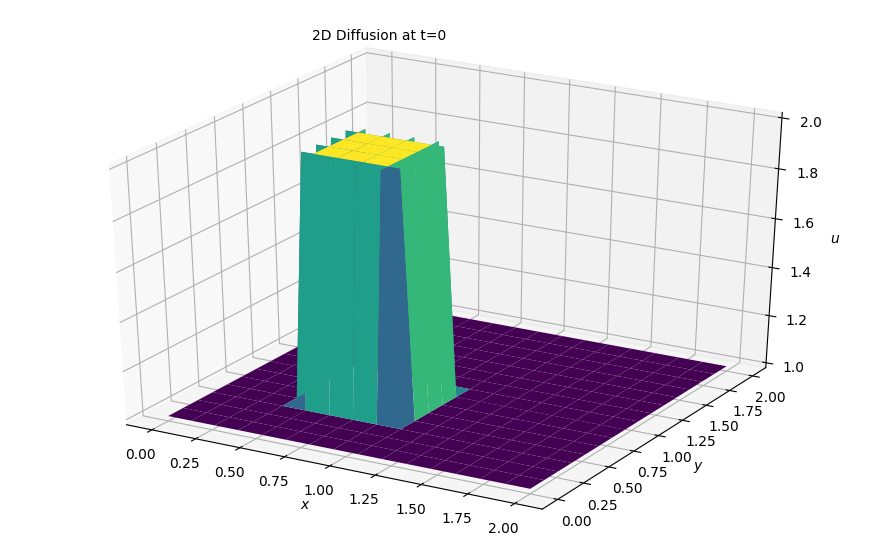

In [3]:
fig = plt.figure(figsize=(11,7), dpi= 100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)

surf = ax.plot_surface(X,Y, u[:], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_zlabel('$u$')
ax.set_ylabel('$y$');
ax.text2D(0.35, 0.95, "2D Diffusion at t=0", transform=ax.transAxes);

## Solving in 2D

In [4]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    for n in range(nt): ##loop across number of time steps
        un = u.copy()

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] +
                         nu * dt / dx ** 2 *
                         (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         nu * dt / dy ** 2 *
                         (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
    fig = plt.figure(figsize=(11,7), dpi= 100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)

    surf = ax.plot_surface(X,Y, u[:], cmap=cm.viridis, rstride=2, cstride=2)
    ax.set_xlabel('$x$')
    ax.set_zlabel('$u$')
    ax.set_ylabel('$y$');
    ax.text2D(0.35, 0.95, "2D Diffusion at t=10", transform=ax.transAxes);

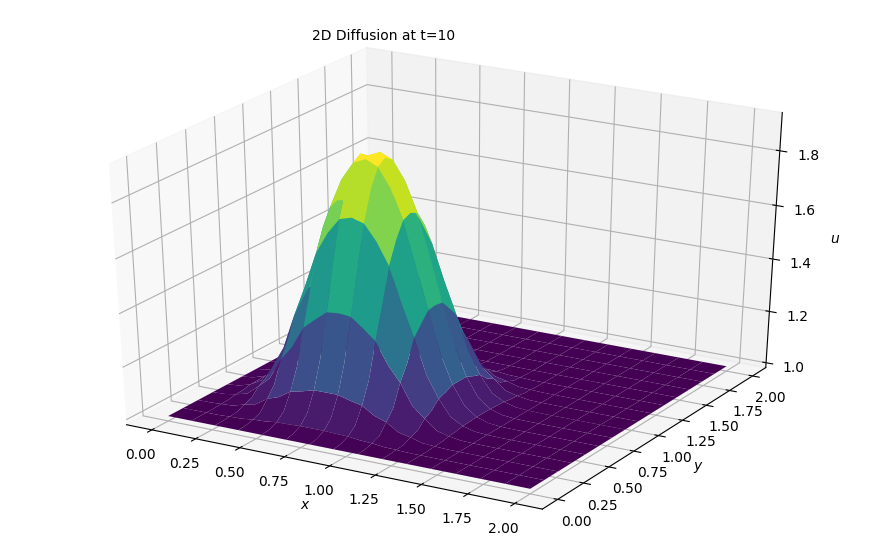

In [5]:
diffuse(10)

### Results

As we can see, the same behavior from the 1D sim is also occurring here. It would also be very cool to see this in an animation, so as always, we are returning to the arduous task of building an animation of this sim.

## Animating the simulation

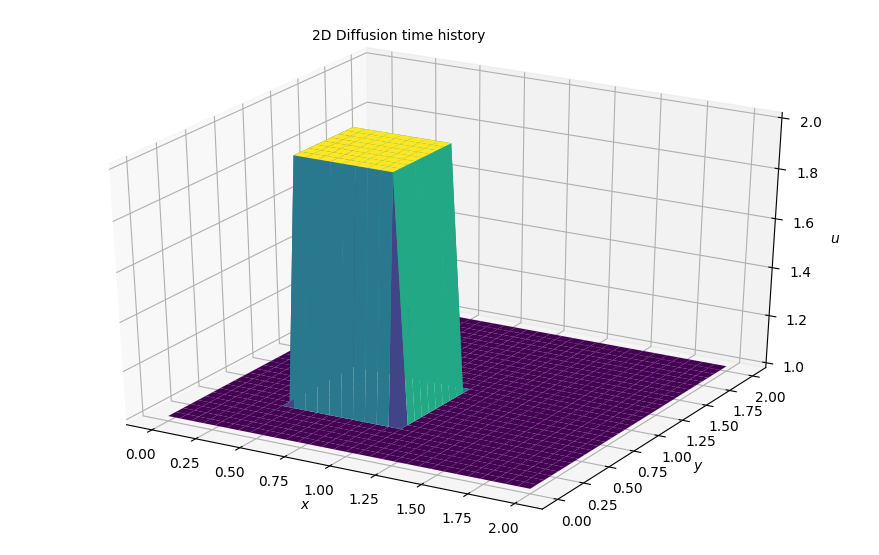

In [6]:
#Imports for animation and display within a jupyter notebook
from matplotlib import animation, rc 
from IPython.display import HTML

#Resetting the U wave back to initial conditions
u = np.ones((grid_points_x, grid_points_y))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
#Generating the figure that will contain the animation
fig = plt.figure(figsize=(9,5), dpi=100)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, u[:] , cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_zlabel('$u$')
ax.set_ylabel('$y$')
ax.text2D(0.35, 0.95, "2D Diffusion time history", transform=ax.transAxes);

In [7]:
#Initialization function for funcanimation
def init():
    ax.clear()
    surf = ax.plot_surface(X, Y, u[:]  , cmap=cm.viridis)
    return surf

In [8]:
#Main animation function, each frame represents a time step in our calculation
def animate(j):
    un = u.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] +
                     nu * dt / dx ** 2 *
                     (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     nu * dt / dy ** 2 *
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    ax.clear()
    surf = ax.plot_surface(X, Y, u[:],rstride=1, cstride=1, cmap=cm.viridis, linewidth= 0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_zlabel('$u$')
    ax.set_ylabel('$y$')
    ax.text2D(0.35, 0.95, "2D Diffusion time history", transform=ax.transAxes);
    return surf

In [9]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20)
#HTML(anim.to_jshtml())
anim.save('../gifs/2dDiff.gif',writer='imagemagick',fps=60)

## Conclusion

This one takes the cake for the coolest one so far! We will move on to applying the burgers' equation in 2D as our finale to the second 3rd of the project.